In [1]:
import os
from pose_vis.extensions.hands import HandsExtension
from pose_vis.runner import PoseVisConfig
from pose_vis.runners.source_runner import SourceStreamRunner, SourceStreamRunnerConfig
from pose_vis.utils import absolute_path

# This runs the SourceStream node in pose_vis/streams/source_stream.py
# It supports videos, image directories, and camera devices
# Given a directory, it will load all images in the directory and run them through
# the graph until all are processed, then closes the graph
# We also enable data logging, outputting to logs/logging_example.h5
config = PoseVisConfig(
    extensions = [HandsExtension()],
    log_directory = f"webcam{os.sep}logs",
    log_name = "logging_example",
    enable_logging = True,
    # 0 disables the Display node
    display_framerate = 0,
    stats_history_size = 0)

# Each source will be ran until completion, in this case we only have 1 source
runner_config = SourceStreamRunnerConfig(
    sources = [absolute_path(f"webcam{os.sep}images")],
    # Since we're loading images from a directory the resolution doesn't apply,
    # but we need to specify a framerate regardless
    resolutions = [(0, 0, 30)])

# Build and run the graph
runner = SourceStreamRunner(config, runner_config)
runner.build()
# Other nodes could be inserted into the graph here, check pose_vis/dynamic_graph.py
runner.run()
# Unfortunately Jupyter doesn't grab the child process output, so we're missing the rest of the console output here
# Unused topic warnings can be ignored

INFO:pose_vis.runner: building graph
INFO:pose_vis.runner: enabling extension: HandsExtension
INFO:pose_vis.runner: logging directory is C:\Users\das\Desktop\labgraph\devices\webcam\logs
INFO:pose_vis.runner: running graph
	- STREAM/OUTPUT has no subscribers
This could mean that there are publishers and/or subscribers of Cthulhu streams that Labgraph doesn't know about, and/or that data in some topics is being discarded.


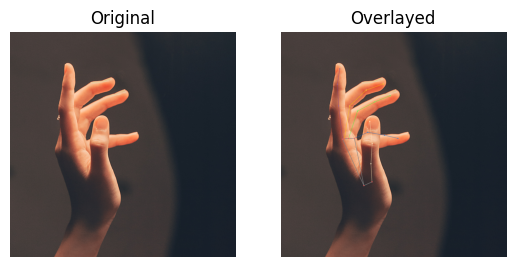

[landmark {
  x: 0.3666782
  y: 0.6836816
  z: 1.3609244e-06
}
landmark {
  x: 0.40242448
  y: 0.667752
  z: -0.18654017
}
landmark {
  x: 0.39794287
  y: 0.5872192
  z: -0.24172299
}
landmark {
  x: 0.40340263
  y: 0.49869713
  z: -0.24058115
}
landmark {
  x: 0.3927693
  y: 0.40063044
  z: -0.22521572
}
landmark {
  x: 0.27260906
  y: 0.47896463
  z: -0.25453687
}
landmark {
  x: 0.25475854
  y: 0.33122495
  z: -0.31093124
}
landmark {
  x: 0.24936885
  y: 0.23572053
  z: -0.34202737
}
landmark {
  x: 0.26004127
  y: 0.16758552
  z: -0.3568705
}
landmark {
  x: 0.2801903
  y: 0.47701693
  z: -0.14896862
}
landmark {
  x: 0.30427077
  y: 0.33153397
  z: -0.19376588
}
landmark {
  x: 0.37751722
  y: 0.2612969
  z: -0.21913196
}
landmark {
  x: 0.4529705
  y: 0.23412205
  z: -0.23570204
}
landmark {
  x: 0.29964173
  y: 0.47477144
  z: -0.049662407
}
landmark {
  x: 0.3382794
  y: 0.3543827
  z: -0.105578855
}
landmark {
  x: 0.41483483
  y: 0.31347528
  z: -0.16686752
}
landmark {
  x:

In [6]:
import os
import cv2
import matplotlib.pyplot as plt
from labgraph.loggers.hdf5.reader import HDF5Reader
from pose_vis.utils import absolute_path
from pose_vis.streams.messages import CaptureResult
from pose_vis.extension import ExtensionResult
from pose_vis.extensions.hands import HandsExtension

# Let's load the hdf5 log
path = absolute_path(f"webcam{os.sep}logs{os.sep}logging_example.h5")
# All data is logged under the "captures" dataset
log_types = {"captures": CaptureResult}
reader = HDF5Reader(path, log_types)

# Since the images directory only contains 1 image, there should only be 1 set of messages
message: CaptureResult = reader.logs["captures"][0]

# Draw an overlay using data created by HandsExtension
# The captures attribute is a list of every source given to the runner
original_image = message.captures[0].frame
overlayed_image = original_image.copy()
HandsExtension.draw_overlay(
    overlayed_image,
    # Like captures, extensions holds results per-stream
    ExtensionResult(data = message.extensions[0]["HandsExtension"]))

# We should convert from BGR to RGB for matplotlib
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
overlayed_image = cv2.cvtColor(overlayed_image, cv2.COLOR_BGR2RGB)

# Let's take a look at the images
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(original_image)
plt.axis("off")
plt.title("Original")
fig.add_subplot(1, 2, 2)
plt.imshow(overlayed_image)
plt.axis("off")
plt.title("Overlayed")
plt.show()

# We can view the data that the hands extension produced
print(message.extensions[0]["HandsExtension"])